## Telco Classification Project  <br>

### Project Goals:

- Construct a classification model to predict customer churn
- Forcast future churn with enhanced accuracy
- Presenting insightful company recommendations
- Empower executives to improve the current trajectory of customer churn
- Thoroughly document the process and key findings

### Summary of Findings: <br>

My analysis indicates that the top drivers of customer churn are: 

- month-to-month contract type 
- electronic check payment type
- fiber optic internet service
- higher monthly charges
  
Top drivers of customer loyalty are: <br>
  
- two year contract type
- higher tenure
  
I contructed and trained a random forest classification model which is able to predict churn with 82% accuracy (9% better accuracy than baseline). <br>

### Summary of Recommendations: <br>

By utilizing this model and considering the drivers customer churn & retention, I can recommend the following with reasonable confidence:

- Prefered Plan: Proactively reach out to customers that are predicted to churn (use predictions.csv in this repository for specific customers and churn prediction). Address any concerns with awareness to top drivers of churn. Make the customer's life easier (and our churn rate lower), by helping them switch to our prefered two-year auto-pay plan. 

- Incentivize loyalty: As customers on a two year contract have very low churn, we need switch as many month-to-month payers over as possible. We should offer at least one perk (ie. a complimentary 6 months of device protection and/or streaming services) for customers that switch to autopay.

- Offer Pausing Service: For month-to-month customers resistant to change, implement the option to pause service for up to 6 months. This will buy time to retain these customers and slow down churn.

### Data Acquistion

- Import necessary libraries
- Pull in the Telco data using acquire.py file

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from scipy import stats

from pydataset import data

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare
from prepare import prep_telco

In [2]:
df = acquire.get_telco_data()
pd.set_option('display.max_columns', None)
df.head() #this returns the first 5 records in the dataset 

,Unnamed: 0,contract_type_id,payment_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
0,0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,DSL,Mailed check,One year
1,1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,DSL,Mailed check,Month-to-month
2,2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Electronic check,Month-to-month
3,3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Electronic check,Month-to-month
4,4,1,2,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Mailed check,Month-to-month


In [3]:
df.info() #this returns all of the column names and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   payment_type_id           7043 non-null   int64  
 3   internet_service_type_id  7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

### Preparation

In [4]:
df = prep_telco(df)
df.head()
#- Use a pre-defined function in the prepare.py that cleans the data and also creates encoded variables (categories represented numerically) which is essential in data modeling. The encoded variables can be easily identified as they start with an "e_" before the cateogory name.

,e_gender_male,e_partner,e_dependents,e_phone_service,e_multiple_lines,e_tech_support,e_tv_stream,e_movies_stream,e_paperless_bill,e_online_backup,e_online_sec,e_device_protection,e_churn,e_fiber_optic,e_no_internet,e_cc_auto,e_check_electric,e_check_mail,e_oneyr,e_twoyr,e_senior,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
0,0,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0002-ORFBO,Female,No,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,DSL,Mailed check,One year
1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0003-MKNFE,Male,No,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,DSL,Mailed check,Month-to-month
2,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0004-TLHLJ,Male,No,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Electronic check,Month-to-month
3,1,1,0,1,0,0,1,1,1,1,0,1,1,1,0,0,1,0,0,0,1,0011-IGKFF,Male,Yes,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Electronic check,Month-to-month
4,0,1,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0013-EXCHZ,Female,Yes,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Fiber optic,Mailed check,Month-to-month


### Univariate Exploration

- Explore and visualize the data independently 
- The goal of this step is to get to know the data well

In [5]:
#How many customers have churned
df.churn.value_counts()

No     5163
Yes    1869
Name: churn, dtype: int64

#### Approximately 27% of customers have churned

Text(0.5, 1.0, 'Churned Customers')

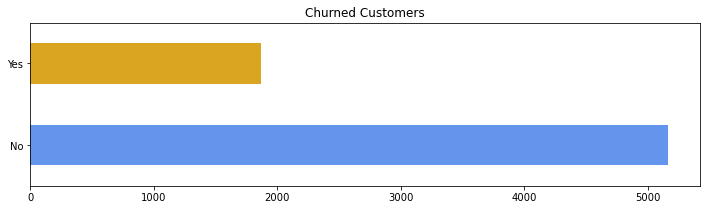

In [6]:
# Visualizing Churn
plt.figure(figsize=(12,3))
df.churn.value_counts().plot(kind='barh', color = ["cornflowerblue", "goldenrod"])
plt.title("Churned Customers")

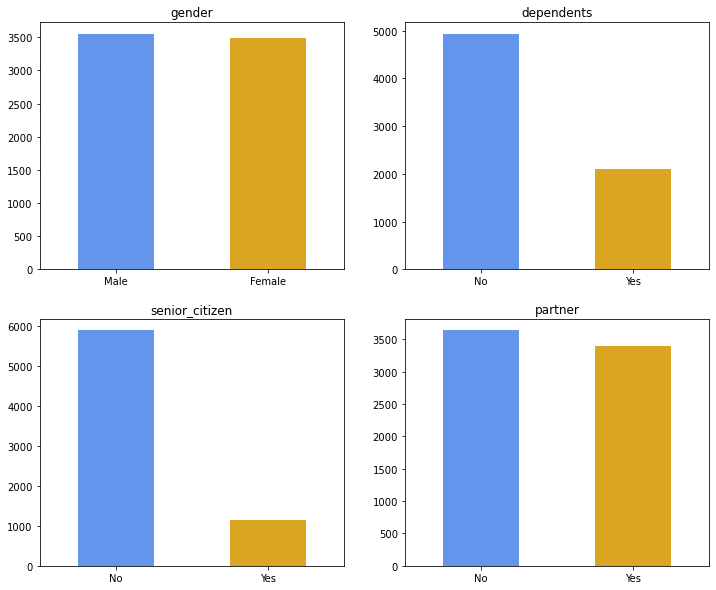

In [7]:
demographics_categorical = ['gender', 'senior_citizen', 'partner', 'dependents']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (12, 10))

for i, item in enumerate(demographics_categorical):
    if i < 2:
        ax = df[item].value_counts().plot(kind = 'bar', color = ["cornflowerblue", "goldenrod"], ax=axes[i,0],rot = 0)
        
    elif i >=2 :
        ax = df[item].value_counts().plot(kind = 'bar', color = ["cornflowerblue", "goldenrod"], ax=axes[i-3,1],rot = 0)
    
 
    ax.set_title(item)

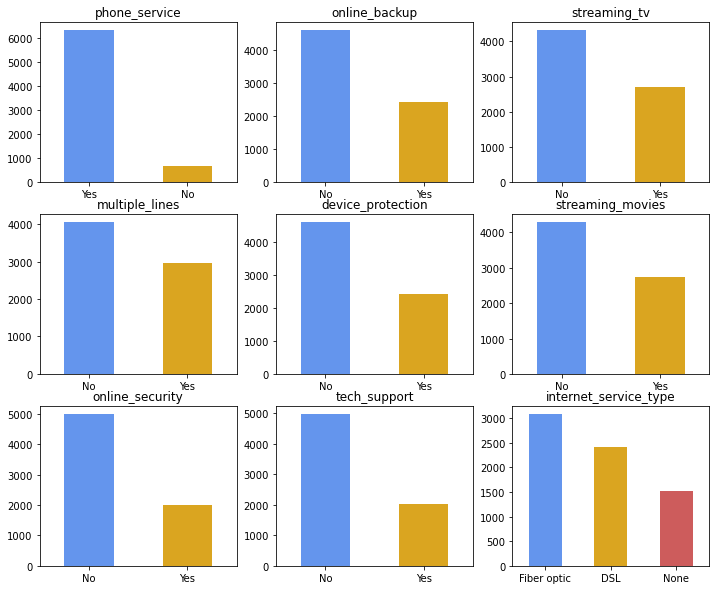

In [8]:
service_categorical = ['phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'internet_service_type']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (12, 10))

for i, item in enumerate(service_categorical):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar', color = ["cornflowerblue", "goldenrod"], ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar', color = ["cornflowerblue", "goldenrod"], ax=axes[i-3,1],rot = 0)
        
    elif i < 10 :
        ax = df[item].value_counts().plot(kind = 'bar', color = ["cornflowerblue", "goldenrod", "indianred"], ax=axes[i-6,2],rot = 0)
    
    ax.set_title(item)

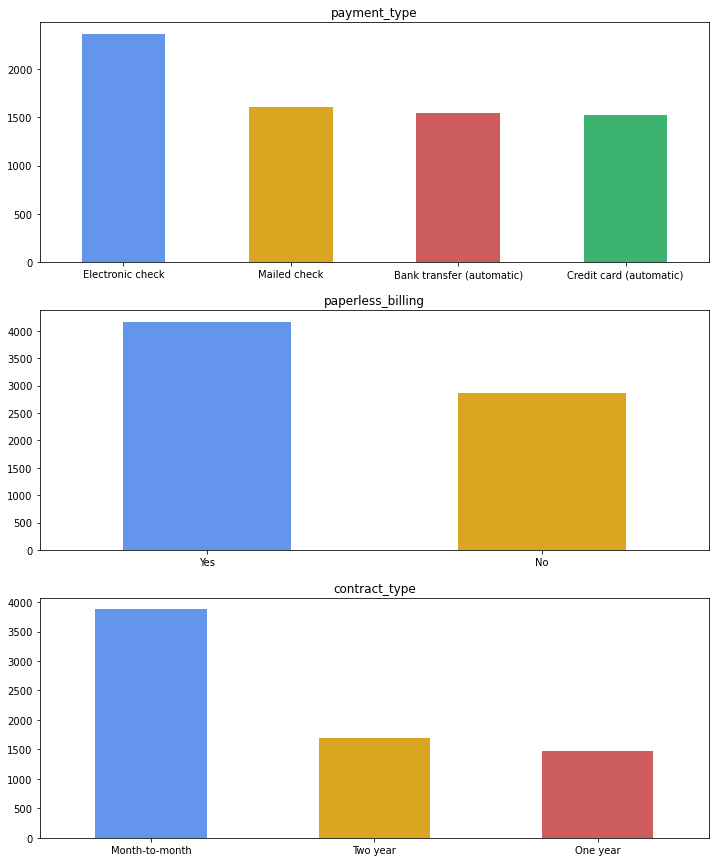

In [9]:
account_categorical = ['payment_type','paperless_billing','contract_type']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (12, 15))

for i, item in enumerate(account_categorical):
        ax = df[item].value_counts().plot(kind = 'bar', color = ["cornflowerblue", "goldenrod", "indianred", "mediumseagreen"], ax=axes[i],rot = 0)
    
        ax.set_title(item)

In [10]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
print()
printmd("**Customer Account Data (Continuous)**")
print("--------------------------------")
printmd("**Customers' Tenure**")
printmd('*Maximum Tenure of customers: {:.2f}*'
     .format(df['tenure'].max()))
printmd('*Minimum Tenure of customers: {:.2f}*'
     .format(df['tenure'].min()))
printmd('*Average Tenure of customers: {:.2f}*'
     .format(df['tenure'].mean()))
print("--------------------------------")
printmd("**Customers' Monthly Charges**")
printmd('*Maximum Total Charges of customers: {:.2f}*'
     .format(df['monthly_charges'].max()))
printmd('*Minimum Total Charges of customers: {:.2f}*'
     .format(df['monthly_charges'].min()))
printmd('*Average Total Charges of customers: {:.2f}*'
     .format(df['monthly_charges'].mean()))
print("--------------------------------")
printmd("**Customers' Total Charges**")
printmd('*Maximum Total Charges of customers: {:.2f}*'
     .format(df['total_charges'].max()))
printmd('*Minimum Total Charges of customers: {:.2f}*'
     .format(df['total_charges'].min()))
printmd('*Average Total Charges of customers: {:.2f}*'
     .format(df['total_charges'].mean()))

**Customer Account Data (Continuous)**

--------------------------------


**Customers' Tenure**

*Maximum Tenure of customers: 72.00*

*Minimum Tenure of customers: 1.00*

*Average Tenure of customers: 32.42*

--------------------------------


**Customers' Monthly Charges**

*Maximum Total Charges of customers: 118.75*

*Minimum Total Charges of customers: 18.25*

*Average Total Charges of customers: 64.80*

--------------------------------


**Customers' Total Charges**

*Maximum Total Charges of customers: 8684.80*

*Minimum Total Charges of customers: 18.80*

*Average Total Charges of customers: 2283.30*

### Exploratory Data Analysis & Statistical Testing
- Split data into 3 subsets for proper statistical analysis and modeling
- Create hypotheses relating to customer churn
- Visualize bivariate and/or multivariate data and assess hypotheses using statistical tests

In [11]:
from prepare import train_validate_test_split
train, validate, test = train_validate_test_split(df, target="churn", seed=123)
train.shape, validate.shape, test.shape

((3937, 42), (1688, 42), (1407, 42))

<AxesSubplot:title={'center':'Feature Correlation to Churn'}>

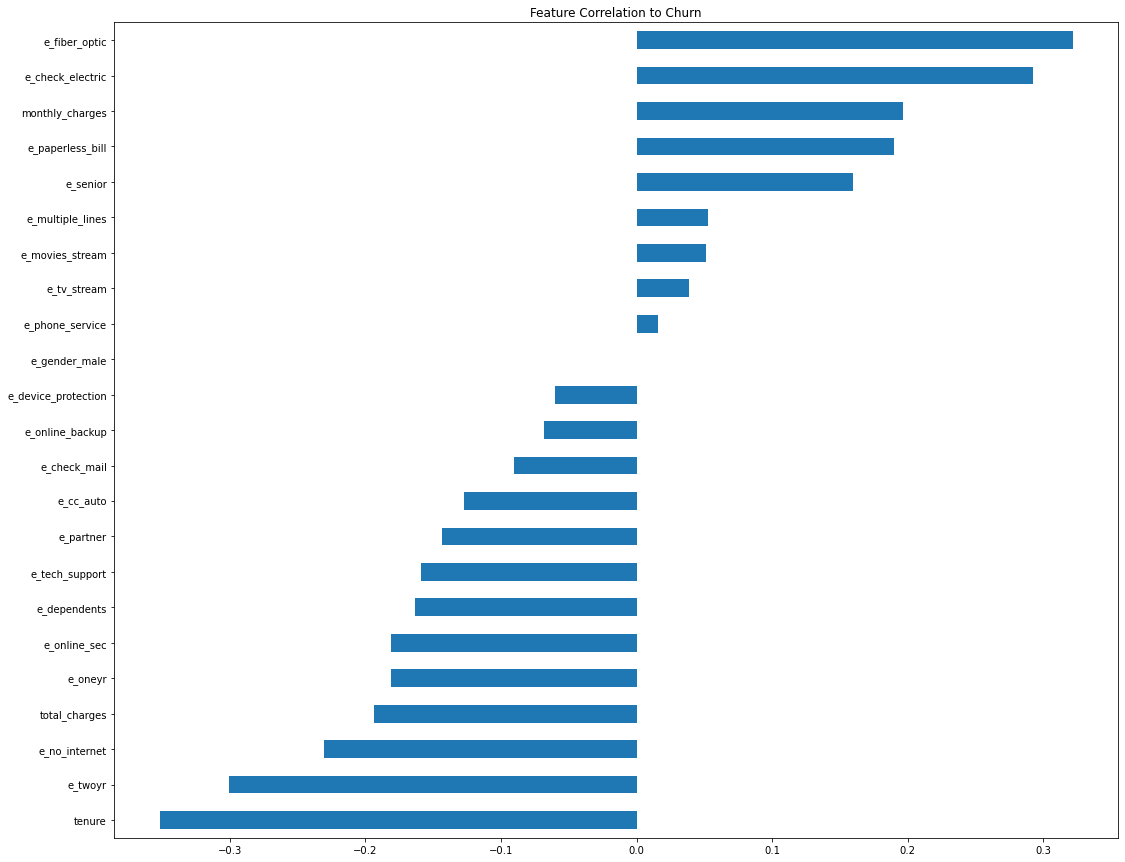

In [12]:
plt.figure(figsize=(18,15))
plt.title("Feature Correlation to Churn")
corr_chart = train.drop("e_churn", axis=1).corrwith(train['e_churn']).sort_values().plot.barh()
corr_chart

This graph displays features and how heavily they are (or are not) correlated to churn.
Based on this figure, contract_type, payment_type, internet_type, and tenure show high correlations with churn and I predict that these features are drivers of churn and/or loyalty. It looks like two year contracts and tenure (as tenure increases) have strong negative correlations with churn so these features may indicate customer retention.

The following four charts depicts the relationship (or lack there of), of contract_type, payment_type, internet_type, and tenure and churn.

Text(0.5, 1.0, 'Churn and Payment Type')

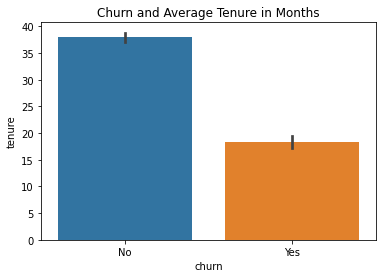

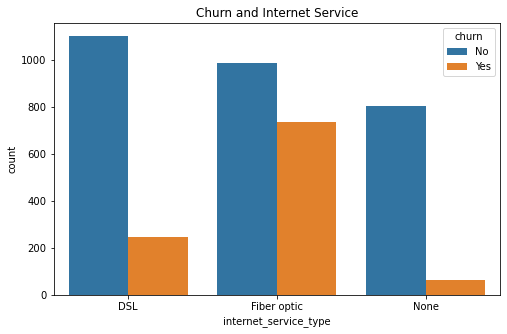

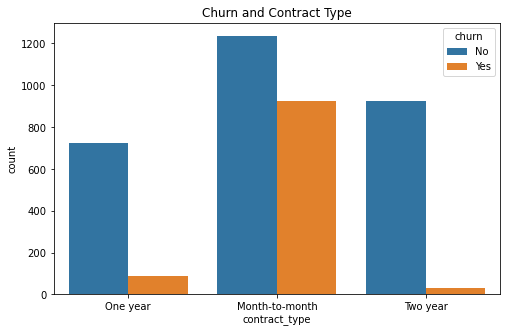

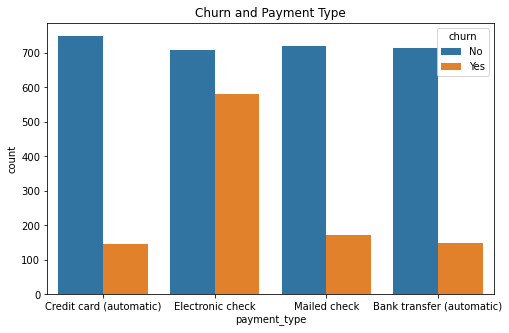

In [13]:
sns.barplot(data=train, x='churn', y='tenure')
plt.title("Churn and Average Tenure in Months")

plt.figure(figsize=(8,5))
sns.countplot(train['internet_service_type'],hue=train['churn'])
plt.title("Churn and Internet Service")

plt.figure(figsize=(8,5))
sns.countplot(train['contract_type'],hue=train['churn'])
plt.title("Churn and Contract Type")

plt.figure(figsize=(8,5))
sns.countplot(train['payment_type'],hue=train['churn'])
plt.title("Churn and Payment Type")

#### Takeaways from visualizations:
Because low tenure and fiber optic internet service are both correlated with churn, I am curious if there is a relationship between these two features. Perhaps customers dislike fiber optic service and decide to leave Telco which would have an impact on tenure. To explore this notion, I am running a two sample T test which will test for any significant relationship.

$H_0$: There is no relationship between fiber optic internet service and tenure

$H_a$ : There is a relationship between fiber optic internet service and tenure


#### Setting Alpha 
- Alpha is set to an industry standard of .05 which will be the threshold in determine statistical significance  

In [14]:
alpha = .05 

churn_sample = train[train.internet_service_type == 'Fiber optic'].tenure
overall_mean = train.tenure.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p, alpha)

if p > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

1.366592109545508 0.17193169709235595 0.05
We fail to reject the null hypothesis


#### Takeaways from T-test
- The T test showed that there is not enough statisical significance to determine a relationship between fiber optic internet service and tenure.

#### Churn and Contract Type
Assessing a potential relationship between churn and contract type with a chi squared statistical test (for two categorical variables)

$H_0$: There is no relationship between churn and contract type

$H_a$ : There is a relationship between churn and contract type

In [15]:
alpha = .05

observed = pd.crosstab(train.churn, train.contract_type)
info, p, info2, info3 = stats.chi2_contingency(observed)

if p > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We reject the null hypothesis


In [16]:
observed

contract_type,Month-to-month,One year,Two year
churn,,,
No,1238,726,927
Yes,927,89,30


Based on this statistical test, churn and contract type are likely relationship. This crosstab depiction of churn and contract type futher demonstrates this relationship. Contract type may be very important in assessing churn risk.

#### Churn and Payment Type

Assessing a potential relationship between churn and payment type with a chi squared statistical test (for two categorical variables) <br>

𝐻0 : There is no relationship between churn and payment type

𝐻𝑎  : There is a relationship between churn and payment type

In [17]:
alpha = .05

observed = pd.crosstab(train.churn, train.payment_type)
info, p, info2, info3 = stats.chi2_contingency(observed)

if p > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We reject the null hypothesis


In [18]:
observed

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
No,713,750,708,720
Yes,149,145,581,171


Based on this statistical test, churn and payment type are likely related. This crosstab depiction of churn and contract type futher demonstrates this relationship. Payment type may be very important in assessing churn risk.

### Modeling

Establish baseline accuracy which is one determinant of the worth of a model. The model's accuracy must except baseline accuracy to be considered valuable in predicting churn.

In [19]:
baseline_accuracy = ((train.churn == 'No').sum() / len(train.churn))
baseline_accuracy.round(2) 

0.73

After several trials, the top 3 performing classification models are:
   - Decision Tree Classifier (max_depth of 3)
   - Random Forest Classifier (max_depth of 7)
   - K-Nearest Neighbor (neighbors: 10)

#### Decision Tree Classifier (max_depth of 3)

A decision tree is a flowchart-like structure where an internal node represents the feature, the branch represents a decision rule, and each leaf node represents the predicted outcome. The max depth determines how many layers of features the model works through to make predictions.

In [20]:
#Before visualize the decision tree, it's necessary to further split the data into X (categorial features) and y (target variable: churn). Because we can only include encoded categorial variables, I am dropping other columns. This needs to be done on train, validate, and test subsets
X_train_DT = train.drop(columns=['customer_id','e_churn', 'churn','gender','partner', 'dependents', 'phone_service',
                             'multiple_lines', 'online_security', 'online_backup', 'device_protection',
                             'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                             'total_charges', 'internet_service_type', 'payment_type', 'contract_type', 'senior_citizen'])
y_train_DT = train.e_churn

X_validate_DT = validate.drop(columns=['customer_id','e_churn', 'churn','gender','partner', 'dependents', 'phone_service',
                             'multiple_lines', 'online_security', 'online_backup', 'device_protection',
                             'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                             'total_charges', 'internet_service_type', 'payment_type', 'contract_type', 'senior_citizen'])
y_validate_DT = validate.e_churn

X_test_DT = test.drop(columns=['customer_id', 'e_churn', 'churn','gender','partner', 'dependents', 'phone_service',
                             'multiple_lines', 'online_security', 'online_backup', 'device_protection',
                             'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                             'total_charges', 'internet_service_type', 'payment_type', 'contract_type', 'senior_citizen'])
y_test_DT = test.e_churn

[Text(1743.75, 1189.125, 'tenure <= 15.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]'),
 Text(871.875, 849.375, 'e_fiber_optic <= 0.5\ngini = 0.498\nsamples = 1371\nvalue = [733, 638]'),
 Text(435.9375, 509.625, 'tenure <= 3.5\ngini = 0.416\nsamples = 804\nvalue = [567, 237]'),
 Text(217.96875, 169.875, 'gini = 0.491\nsamples = 356\nvalue = [202, 154]'),
 Text(653.90625, 169.875, 'gini = 0.302\nsamples = 448\nvalue = [365, 83]'),
 Text(1307.8125, 509.625, 'tenure <= 1.5\ngini = 0.414\nsamples = 567\nvalue = [166, 401]'),
 Text(1089.84375, 169.875, 'gini = 0.206\nsamples = 129\nvalue = [15, 114]'),
 Text(1525.78125, 169.875, 'gini = 0.452\nsamples = 438\nvalue = [151, 287]'),
 Text(2615.625, 849.375, 'e_fiber_optic <= 0.5\ngini = 0.267\nsamples = 2566\nvalue = [2158, 408]'),
 Text(2179.6875, 509.625, 'e_twoyr <= 0.5\ngini = 0.099\nsamples = 1411\nvalue = [1337, 74]'),
 Text(1961.71875, 169.875, 'gini = 0.155\nsamples = 742\nvalue = [679, 63]'),
 Text(2397.65625, 169.875, 'gini = 

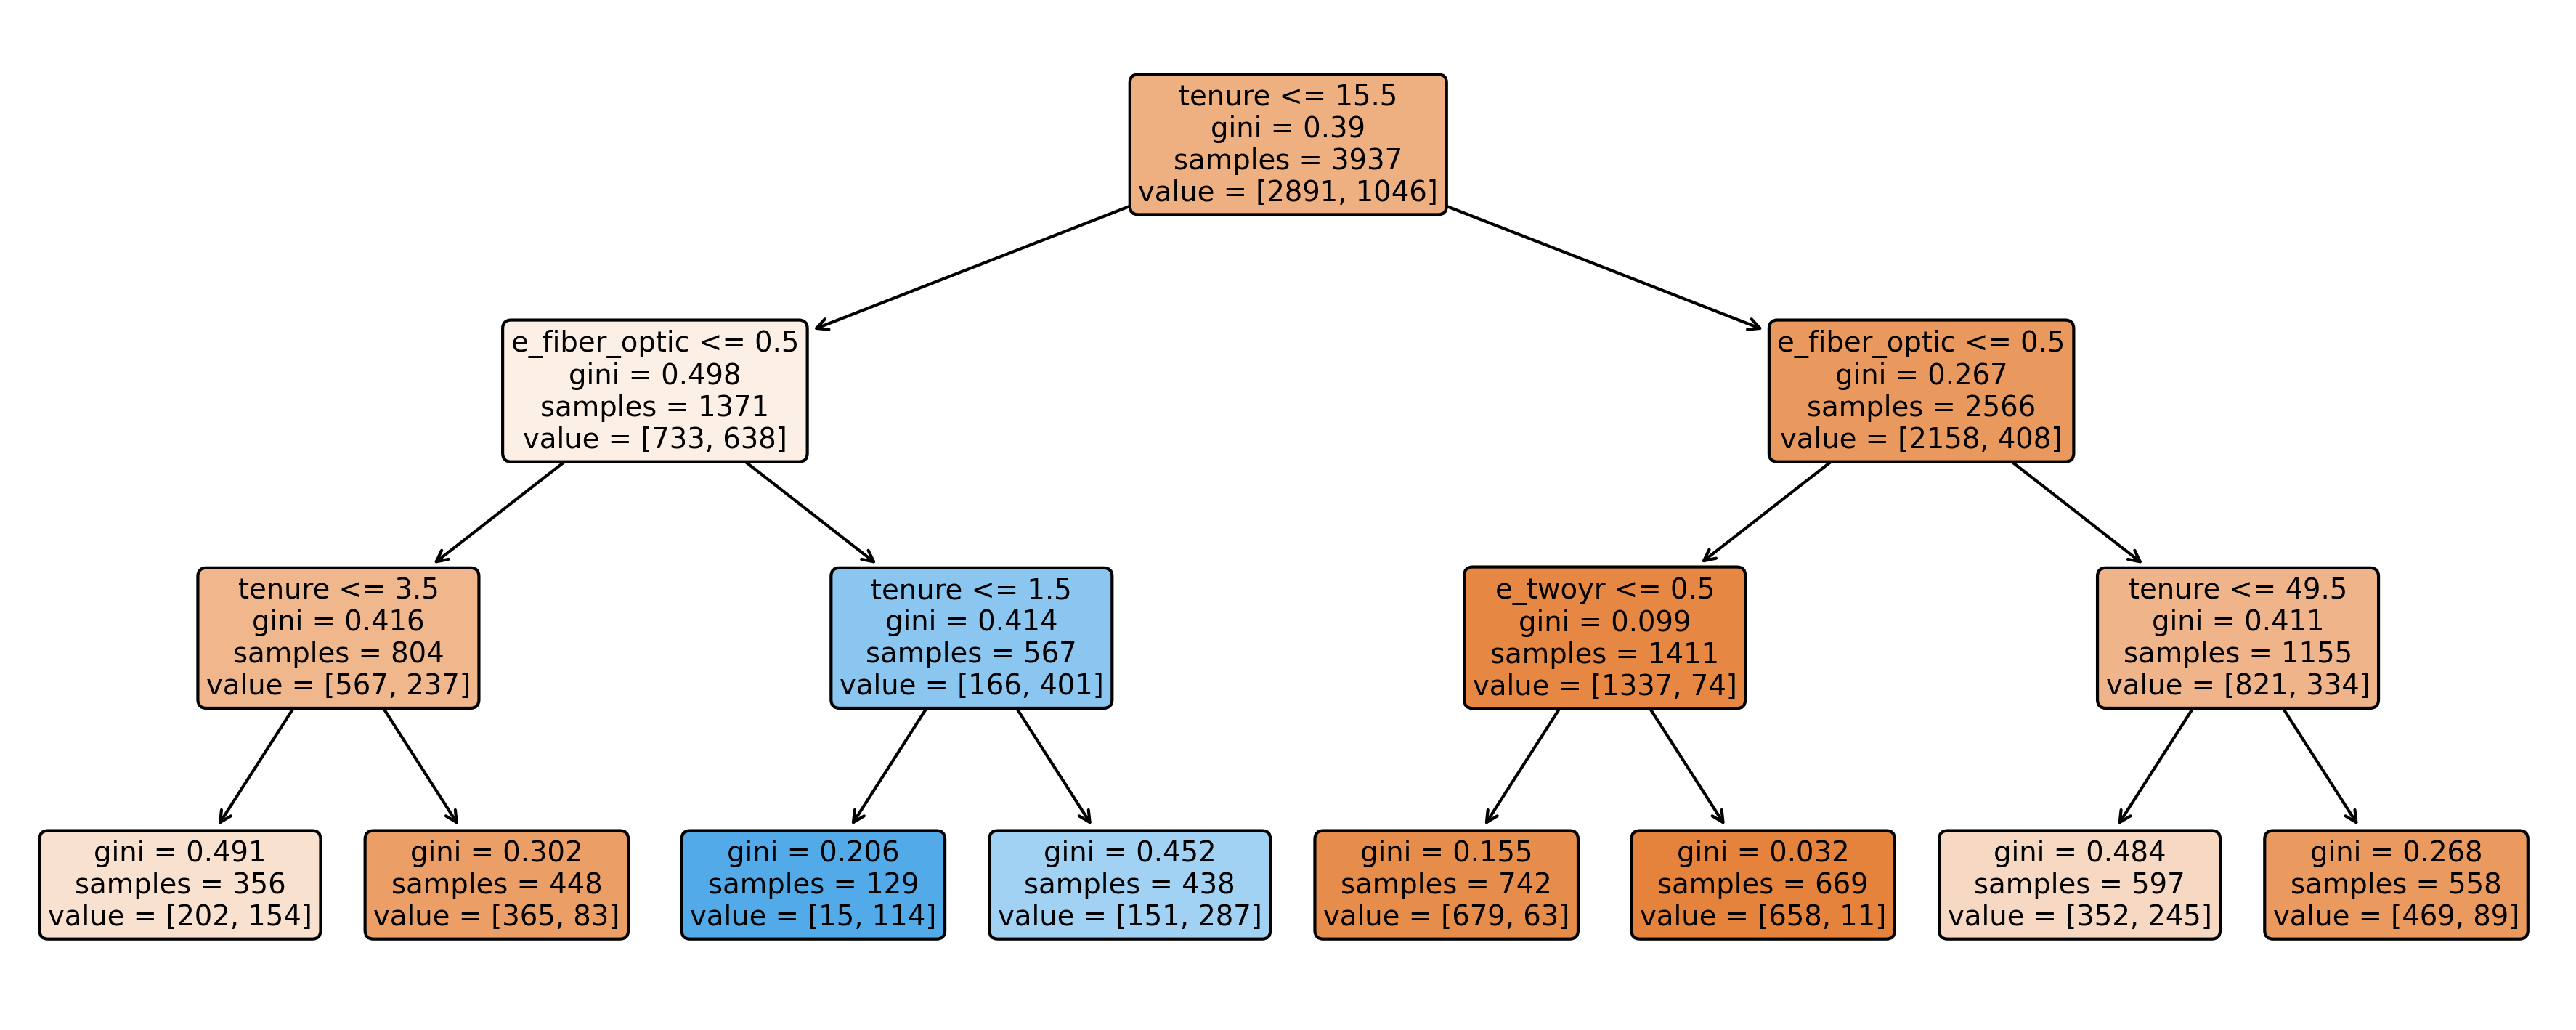

In [21]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf = clf.fit(X_train_DT, y_train_DT)
plt.figure(figsize=(15, 6), dpi=300)
plot_tree(clf, feature_names=X_train_DT.columns, filled= True, rounded=True)

In [22]:
y_pred_DT = clf.predict(X_train_DT)
y_pred_proba_DT = clf.predict_proba(X_train_DT)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train_DT, y_train_DT)))

Accuracy of Decision Tree classifier on training set: 0.79


In [23]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate_DT, y_validate_DT)))

Accuracy of Decision Tree classifier on validate set: 0.78


I was able to fine tune this decision tree to the point of having virutally no difference between the train and validate subsets which means I've minimized the risk of overfitting (tailoring to the train data only). The accuracy is 6% higher than baseline accuracy which means this model does have value in predicting churn. However, if a model exceeds 80% accuracy, that'd be ideal moving forward.

#### Random Forest Classifier

Random Forests grows many classification trees. To make a prediction on the target variable(churn), the features(X) run down each of the trees in the forest. Each tree gives a classification, and the tree "votes" on the prediction. The forest chooses the outcome having the most "votes."

Because overfitting isn't as much of an issue on this model, the max depth of 7 was determined by trial and error.

In [24]:
#the data spliting process is repeated for the new model
X_train_RF = train.drop(columns=['customer_id','e_churn', 'churn','gender','partner', 'dependents', 'phone_service',
                             'multiple_lines', 'online_security', 'online_backup', 'device_protection',
                             'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                             'total_charges', 'internet_service_type', 'payment_type', 'contract_type', 'senior_citizen'])
y_train_RF = train.e_churn

X_validate_RF = validate.drop(columns=['customer_id','e_churn', 'churn','gender','partner', 'dependents', 'phone_service',
                             'multiple_lines', 'online_security', 'online_backup', 'device_protection',
                             'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                             'total_charges', 'internet_service_type', 'payment_type', 'contract_type', 'senior_citizen'])
y_validate_RF = validate.e_churn

X_test_RF = test.drop(columns=['customer_id','e_churn', 'churn','gender','partner', 'dependents', 'phone_service',
                             'multiple_lines', 'online_security', 'online_backup', 'device_protection',
                             'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                             'total_charges', 'internet_service_type', 'payment_type', 'contract_type', 'senior_citizen'])
y_test_RF = test.e_churn

In [25]:
rf = RandomForestClassifier(max_depth=7, 
                            random_state=123)
rf.fit(X_train_RF, y_train_RF)
feature_importances = rf.feature_importances_
feature_scores = pd.Series(rf.feature_importances_, index=X_train_RF.columns).sort_values(ascending=False)
y_pred_RF = rf.predict(X_train_RF)
y_pred_proba_RF = rf.predict_proba(X_train_RF)

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train_RF, y_train_RF)))

Accuracy of random forest classifier on training set: 0.82


In [26]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate_RF, y_validate_RF)))

Accuracy of random forest classifier on validate set: 0.79


This random forest model has an accuracy of 82% on the training subset and 79% on the validate subset. The accuracies are close enough together to determine this model is likely performing correctly and is valuable in predicting churn. 

### K-Nearest Neighbor
This model makes predictions by calculating the distance between data and all the training points. The prediction is made like a majority vote (most frequently represented around a given data point)



In [27]:
X_train_KNN = train.drop(columns=['customer_id','e_churn', 'churn','gender','partner', 'dependents', 'phone_service',
                             'multiple_lines', 'online_security', 'online_backup', 'device_protection',
                             'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                             'total_charges', 'internet_service_type', 'payment_type', 'contract_type', 'senior_citizen'])
y_train_KNN = train.e_churn

X_validate_KNN = validate.drop(columns=['customer_id','e_churn', 'churn','gender','partner', 'dependents', 'phone_service',
                             'multiple_lines', 'online_security', 'online_backup', 'device_protection',
                             'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                             'total_charges', 'internet_service_type', 'payment_type', 'contract_type', 'senior_citizen'])
y_validate_KNN = validate.e_churn

X_test_KNN = test.drop(columns=['customer_id','e_churn', 'churn','gender','partner', 'dependents', 'phone_service',
                             'multiple_lines', 'online_security', 'online_backup', 'device_protection',
                             'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                             'total_charges', 'internet_service_type', 'payment_type', 'contract_type', 'senior_citizen'])
y_test_KNN = test.e_churn

In [28]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(X_train_KNN, y_train_KNN)
KNeighborsClassifier()
y_pred_KNN = knn.predict(X_train_KNN)
y_pred_proba_KNN = knn.predict_proba(X_train_KNN)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train_KNN, y_train_KNN)))

Accuracy of KNN classifier on training set: 0.82


In [29]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate_KNN, y_validate_KNN)))

Accuracy of KNN classifier on test set: 0.78


The accuracy of the KNN model is almost identical to that of the random forest model. To decide the best model, I will look at a more detailed classification report for each model.

In [30]:
printmd('---------------------------**Random Forest Classification Report**---------------------------')
print(classification_report(y_train_RF, y_pred_RF))
printmd('---------------------------**K-Nearest Neightbor Classification Report**---------------------------')
print(classification_report(y_train_KNN, y_pred_KNN))

---------------------------**Random Forest Classification Report**---------------------------

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      2891
           1       0.73      0.52      0.61      1046

    accuracy                           0.82      3937
   macro avg       0.79      0.73      0.75      3937
weighted avg       0.81      0.82      0.81      3937



---------------------------**K-Nearest Neightbor Classification Report**---------------------------

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2891
           1       0.73      0.48      0.58      1046

    accuracy                           0.82      3937
   macro avg       0.78      0.71      0.73      3937
weighted avg       0.81      0.82      0.80      3937



The random forest classifier appears to be slightly better at catching the churned customers (higher recall for churn being the positive case) and also has a higher F1 (harmonic mean of recall and precision). I determine the random forest classifier as the top model for predicting customer churn at this time.

#### Final Step in Modeling: 
 - Run the test subset on the chosen model

In [31]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test_RF, y_test_RF)))

Accuracy of random forest classifier on test set: 0.80


Accuracy of random forest classifier on training set: 82% <br>
Accuracy of random forest classifier on validate set: 79% <br>
Accuracy of random forest classifier on test set:     80%

Create a .csv with the chosen model's churn predictions for each customer. This is valuable for being able to take action before the customer churns based on the risk determined by the model.

In [32]:
y_predictions = rf.predict(X_test_RF)
y_proba = rf.predict_proba(X_test_RF)

predictions = pd.DataFrame()
predictions['customer_id'] = test.customer_id
predictions['prediction'] = y_predictions
predictions['probability'] = y_proba[:,1]

predictions.to_csv("predictions.csv")

### Conclusion

Top drivers of customer churn: <br> 

- month-to-month contract type 
- electronic check payment type
- fiber optic internet service
- higher monthly charges
  
Top drivers of customer loyalty: <br>
  
- two year contract type
- higher tenure

The random forest classification model is the most valuable model in predicting customer churn. <br>

### Summary of Recommendations: <br>

By utilizing this model and considering the drivers customer churn & retention, I can recommend the following with reasonable confidence:

- Prefered Plan: Proactively reach out to customers that are predicted to churn (use predictions.csv in this repository for specific customers and churn prediction). Address any concerns with awareness to top drivers of churn. Make the customer's life easier (and our churn rate lower), by helping them switch to our prefered two-year auto-pay plan. 

- Incentivize loyalty: As customers on a two year contract have very low churn, we need switch as many month-to-month payers over as possible. We should offer at least one perk (ie. a complimentary 6 months of device protection and/or streaming services) for customers that switch to autopay.

- Offer Pausing Service: For month-to-month customers resistant to change, implement the option to pause service for up to 6 months. This will buy time to retain these customers and slow down churn.

### Next Steps

- Acquire more data about Telco customers to consider other potential drivers of churn

- Perform further modeling with the goal of improving churn prediction even further

- Quantify, visualize, and analyze the success of the of changes implented